In [4]:
!pip install rosbags

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.0 MB/s eta 0:00:008.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 KB 10.5 MB/s eta 0:00:0031m11.6 MB/s eta 0:00:01


In [1]:
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr


In [2]:
bag_file = './rosbag2_2023_02_05-15_59_54'


# create reader instance and open for reading
with Reader(bag_file) as reader:
    connections = [x for x in reader.connections if x.topic == '/imu_raw/Imu']
#     connections = [x for x in reader.connections if x.topic == '/turtle1/cmd_vel']


    vellist=[]
    for connection, timestamp, rawdata in reader.messages(connections=connections):
        msg = deserialize_cdr(rawdata, connection.msgtype)
#         print(msg.angular.x, msg.angular.y , msg.angular.z)
        vel={}
        vel['Time']=timestamp
        vel['angular.x']=msg.angular.x
        vel['angular.y']=msg.angular.y
        vel['angular.z']=msg.angular.z
        vel['linear.x']=msg.linear.x
        vel['linear.y']=msg.linear.y
        vel['linear.z']=msg.linear.z
        vellist.append(vel)

In [3]:
vellist

[{'Time': 1675592999256131649,
  'angular.x': 0.0,
  'angular.y': 0.0,
  'angular.z': -2.0,
  'linear.x': 0.0,
  'linear.y': 0.0,
  'linear.z': 0.0},
 {'Time': 1675592999939312225,
  'angular.x': 0.0,
  'angular.y': 0.0,
  'angular.z': 0.0,
  'linear.x': 2.0,
  'linear.y': 0.0,
  'linear.z': 0.0},
 {'Time': 1675593000439817566,
  'angular.x': 0.0,
  'angular.y': 0.0,
  'angular.z': 0.0,
  'linear.x': 2.0,
  'linear.y': 0.0,
  'linear.z': 0.0},
 {'Time': 1675593000469780467,
  'angular.x': 0.0,
  'angular.y': 0.0,
  'angular.z': 0.0,
  'linear.x': 2.0,
  'linear.y': 0.0,
  'linear.z': 0.0},
 {'Time': 1675593000501050359,
  'angular.x': 0.0,
  'angular.y': 0.0,
  'angular.z': 0.0,
  'linear.x': 2.0,
  'linear.y': 0.0,
  'linear.z': 0.0},
 {'Time': 1675593000644496256,
  'angular.x': 0.0,
  'angular.y': 0.0,
  'angular.z': -2.0,
  'linear.x': 0.0,
  'linear.y': 0.0,
  'linear.z': 0.0},
 {'Time': 1675593001120418661,
  'angular.x': 0.0,
  'angular.y': 0.0,
  'angular.z': 0.0,
  'linear.x':

In [4]:
import pandas as pd

In [5]:
veldf = pd.DataFrame(vellist)
veldf

,Time,angular.x,angular.y,angular.z,linear.x,linear.y,linear.z
0,1675592999256131649,0.0,0.0,-2.0,0.0,0.0,0.0
1,1675592999939312225,0.0,0.0,0.0,2.0,0.0,0.0
2,1675593000439817566,0.0,0.0,0.0,2.0,0.0,0.0
3,1675593000469780467,0.0,0.0,0.0,2.0,0.0,0.0
4,1675593000501050359,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
972,1675593096881273644,0.0,0.0,-2.0,0.0,0.0,0.0
973,1675593097272404467,0.0,0.0,0.0,2.0,0.0,0.0
974,1675593097763434080,0.0,0.0,0.0,2.0,0.0,0.0
975,1675593098178927298,0.0,0.0,2.0,0.0,0.0,0.0


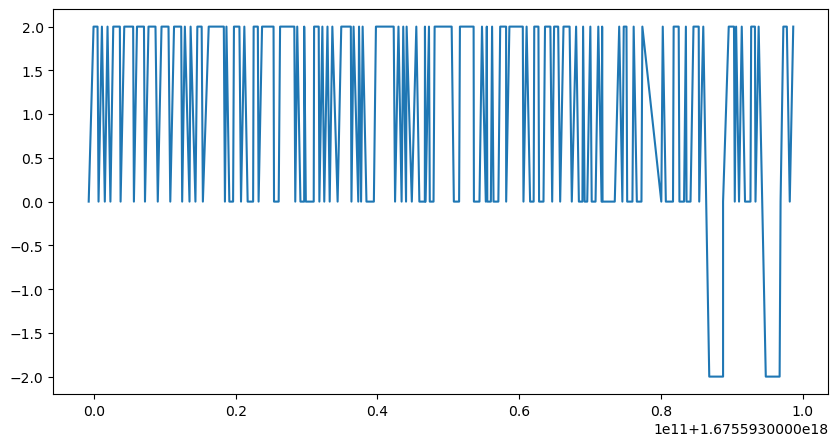

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 5]
plt.plot(veldf['Time'],veldf['linear.x'])